In [ ]:
!pip3 install stylecloud
!pip install wordcloud
!pip install fileupload
!pip install numpy
!pip install stop_words
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=ea1c26eb4715704e12785230669723f25f5f458b14c2b3fdb7ea3a9586086ae1
  Stored in directory: /root/.cache/pip/wheels/da/d8/66/395317506a23a9d1d7de433ad6a7d9e6e16aab48cf028a0f60
Successfully built stop_words
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
import stylecloud
import nltk
from stop_words import get_stop_words
from wordcloud import WordCloud, ImageColorGenerator 
import wordcloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import fileupload
import io
import sys

In [155]:
# create a mask based on the image we wish to include
my_mask = np.array(Image.open('cloudmask.png'))
img = np.array(Image.open('imgbada.jpg'))

stop_words = get_stop_words('english')

# create a wordcloud 



In [160]:
with open('batman.txt', 'r') as txt_file:
    texto = txt_file.read()

def calculate_frequencies(texto):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my",     "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them",     "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being",     "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how",     "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    list_of_words = texto.split()
    
    updated_list_of_words = []
    
    # remove the punctuations and put all into lowercase
    for text in list_of_words:            
        if text.isalpha() == False:
            for indiv_punctuations in punctuations:
                text = text.replace(indiv_punctuations, "")
        lowercase_text = text.lower()
        updated_list_of_words.append(lowercase_text)
    
    # remove the uninteresting words
    removed_uninteresting_words = []
    for text in updated_list_of_words:
        if text not in uninteresting_words:
            removed_uninteresting_words.append(text)
    
    #create new dict
    new_dict = {}
    
    #adding text to dictionary
    for text in removed_uninteresting_words:
        if text not in new_dict: #check if text exist in dict
            new_dict[text] = 1 
        else: #else increment value by 1
            new_dict[text] +=1


    # print(new_dict)
    
    #wordcloud
    cloud = wordcloud.WordCloud(background_color="white",width=800, height=600,stopwords=stop_words)
    image_colors = ImageColorGenerator(img)
    cloud.generate_from_frequencies(new_dict)
    cloud.recolor(color_func=image_colors)

    
    return cloud.to_array()



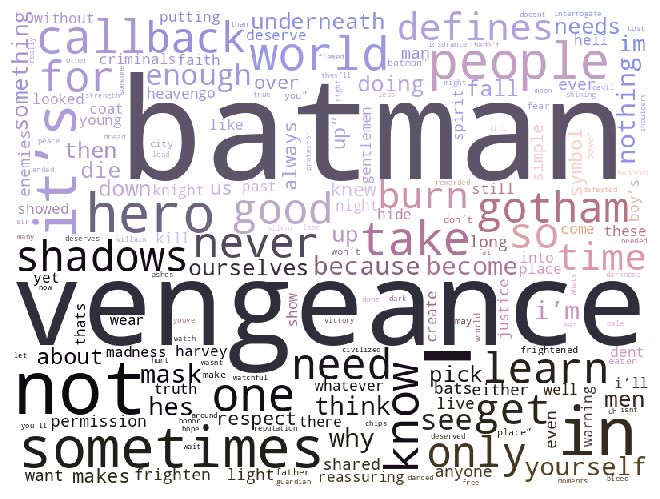

In [161]:
wc = calculate_frequencies(texto)



plt.axis('off')

# plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wc, interpolation = 'nearest')
plt.tight_layout(pad=0)

plt.show()